In [1]:
from trader_factory import build_active_IBridgePy_plus
from IBridgePy.IbridgepyTools import symbol
import pandas as pd
import os

In [2]:
hist = pd.read_csv(os.path.join('tools', 'SPY_1day_20010103_20210409.csv'), header=0, index_col=0)

In [ ]:
hist  # print hist to show it

In [ ]:
hist.columns  # print column names

In [ ]:
hist.index  # print index

In [ ]:
hist['open']  # print out a column

In [ ]:
hist.iloc[0]  # print out 1st row

In [ ]:
hist.iloc[-1]  # print out the last row

In [ ]:
hist.iloc[0]['open']  # print out open price of the 1st row

In [ ]:
type(hist.index[-1])  # print out the data type of index

In [ ]:
hist.loc['2021-04-08']

In [3]:
hist['close_yesterday'] = hist['close'].shift(1)  # add a new column, call it "close_yesterday"

In [ ]:
hist

In [4]:
hist['yield_yesterday'] = (hist['close'] - hist['close_yesterday']) / hist['close_yesterday']

In [ ]:
hist  # a column of yield_yesterday is added.

In [5]:
hist['yield_tomorrow'] = hist['yield_yesterday'].shift(-1)

In [6]:
hist  # A column of yield_tomorrow is added.

,open,high,low,close,volume,dividends,stock splits,close_yesterday,yield_yesterday,yield_tomorrow
Date,,,,,,,,,,
2001-01-03,87.214549,92.439775,86.768493,91.760071,19431600,0.0,0,NaN,NaN,-0.010764
2001-01-04,91.717598,92.078691,90.400671,90.772385,9219000,0.0,0,91.760071,-0.010764,-0.032643
2001-01-05,90.719295,90.825499,87.809311,87.809311,12911400,0.0,0,90.772385,-0.032643,0.007740
2001-01-08,88.276591,88.488998,86.789738,88.488998,6625300,0.0,0,87.809311,0.007740,-0.002641
2001-01-09,89.073094,89.381085,87.968575,88.255325,5702400,0.0,0,88.488998,-0.002641,0.017570
...,...,...,...,...,...,...,...,...,...,...
2021-04-05,403.459991,406.940002,403.380005,406.359985,91684800,0.0,0,400.609985,0.014353,-0.000591
2021-04-06,405.760010,407.239990,405.399994,406.119995,62021000,0.0,0,406.359985,-0.000591,0.001157
2021-04-07,405.940002,406.959991,405.450012,406.589996,55836300,0.0,0,406.119995,0.001157,0.004747


In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [8]:
hist.shape  # There are 250 rows and 8 columns

(5098, 10)

In [9]:
hist.dropna(inplace=True)  # sklearn cannot handle NA and has to drop them.

In [10]:
# Use machine learning package and build a linear regression model to predit tomorrow's price.
x = hist['yield_yesterday']
y = hist['yield_tomorrow']
model = LinearRegression()
model.fit(hist.loc[:, ['yield_yesterday']], y)
print(model.coef_)
print(model.intercept_)

[-0.10119766]
0.0004102646963406521


In [11]:
# Create a column of predicted prices using the linear regression model
preds = model.predict(hist.loc[:, ["yield_yesterday"]])

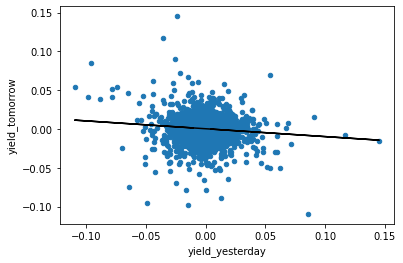

In [12]:
# Draw a scatter plot.
# The scatter dots are yield_tomorrow vs. yield_yesterday
# The black line is drawn to visualize the trend
hist.plot.scatter(x = "yield_yesterday", y = "yield_tomorrow")
plt.plot(hist['yield_yesterday'], preds, color="black")

In [14]:
preds  # predications based on the machine learning model

array([ 1.49953508e-03,  3.71364963e-03, -3.73055247e-04, ...,
        4.70030547e-04,  2.93149006e-04, -7.00981852e-05])

In [15]:
preds[-1]

-7.00981852199933e-05

In [16]:
len(preds)

5096